## Steps for fitting continuous probability distributions to raw data and estimating the distribution's parameters

* BDA 612: Management Analytics
* Prepared by Ehsan Ahmadi


Run the following command if `fitter` library is not installed.

In [1]:
pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


### 1. Loading Libraries
The first step is to install and load different libraries.

`NumPy`: random normal number generation<br>
`Pandas`: data loading<br>
`Seaborn`: histogram plotting<br>
`Fitter`: for identifying the best distribution<br>

From the Fitter library, you need to load Fitter, `get_common_distributions` and `get_distributions` class.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


### 2. Loading Dataset
Read the data using pandas `pd.read_csv()` function and see the first five observations.

In [8]:
dataset = pd.read_csv("/content/drivethru.csv")
data = dataset["drivethru"].values
dataset

,drivethru
0,1
1,2
2,0
3,3
4,1
...,...
91,12
92,14
93,5
94,9


### 3. Plotting Histogram
The first task is to plot the distribution using a histogram to get a preliminary idea of the distribution the data follows.

The `displot()` function from the `seaborn` library is used to plot the histogram. The number of bins provided here is 7.

The plot shows that the service time looks like a normal distribution.

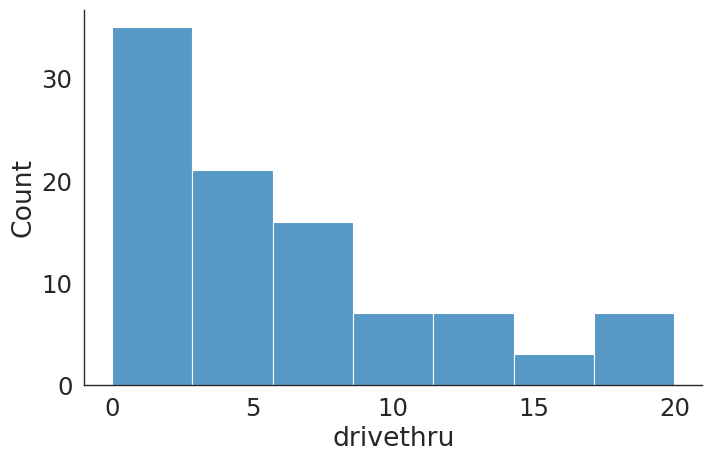

In [10]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="drivethru", kind="hist", bins = 7, aspect = 1.5)

### 4. Preparing Data for Fitting Different Distributions
Before suppling the data to Fitter, it should be converted to a NumPy array. One of the best ways to use the `.values` attribute on the "Service Time" column (`dataset["Service Time"]`) and saving it to the data variable.

In [11]:
data = dataset["drivethru"].values

### 5. Fitting Distributions

The next step is to start fitting different distributions and finding out the best-suited distribution for the data.

The steps are:

1. Create a Fitter instance by calling the `Fitter()`
2. Supply the data and distributions list if you have a basic idea of the distributions that might fit your data
3. Apply the `.fit()` method
4. Generate the fitted distribution summary using `.summary()` method

**Note:**

If you have no initial idea about the distribution which might fit your data then you can call the `Fitter()` and supply the `Fitter(data)` only.

The Fitter class in the backend uses the Scipy library which supports 80 distributions and the Fitter class will scan all of them, call the fit function for you, ignoring those that fail or run forever and finally give you a summary of the best distributions in the sense of sum of the square errors.

But this might take some time as it will try so many distributions and the fitting time also varies with your sample size. **So, it is recommended to first plot a histogram and get an overall idea about the types of distributions that might fit the data and supply those distribution names in a list using the distributions argument.** This will definitely save you time.

Here, I have fitted *expon*,*norm*, *beta*, *uniform*, and *triang* distributions. Calling the **summary()** method on the fitted object shows the different distributions and fit statistics such as *sumsquare_error* and *Kolmogorov-Smirnov (KS)* goodness-of-fit test. By default, the summary function ranks the best five distributions based on the sumsquare_error values in ascending order. Additionally, it provides an illustration of different distributions fitted over a histogram.

For the list of **continuous** probability distributions see [Continuous Statistical Distributions](https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html)

Based on the *sumsquare_error* value the best distribution for the height data is the beta distribution followed by normal distribution.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,1.827703,692.791829,697.920526,inf,0.090678,3.857958e-01
beta,1.830809,667.312731,677.570124,inf,0.114946,1.462421e-01
triang,1.859481,636.999046,644.692091,inf,0.191851,1.436909e-03
norm,1.925854,688.021813,693.150509,inf,0.164926,9.467365e-03
uniform,1.958116,603.146455,608.275151,inf,0.368750,3.234545e-12


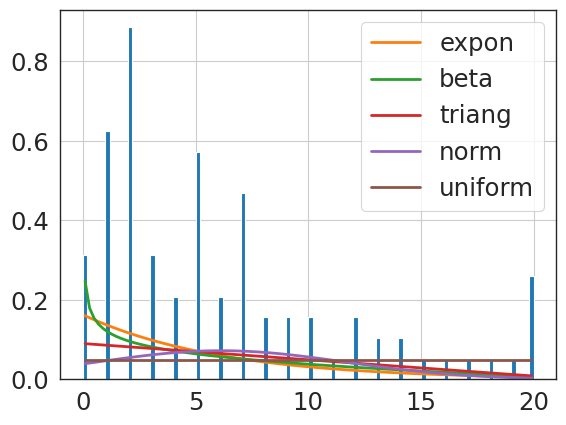

In [12]:
f = Fitter(data, distributions=["expon","norm", "beta", "uniform", "triang"])
f.fit()
f.summary()

There are three main choices for goodness-of-fit tests:
1. **Kolmogorov-Smirnov (KS)**: can only be applied to *continuous* distributions.
2. **Anderson-Darling (AD)**: can only be applied to *continuous* distributions.
3. **Chi-square good of fit**: can be applied to *discrete* as well as *continuous* distributions.

The null and alternative hypotheses for the goodness-of-fit test are the following:

* **Null:** The sample data follow the hypothesized distribution.<br>
* **Alternative:** The sample data do not follow the hypothesized distribution.

According to the results, the *ks_pvalue* for Beta, Normal, and Triangular distributions are 0.9797, 0.9773, and 0.4709, respectively. Because the *p-value* is greater than the assumed significance level of 0.05, we fail to reject the null hypothesis. For distribution tests, failing to reject the null suggests that the data follow the specified distribution. Therefore, We can conclude that our data follows the Beta, Normal, and Triangular distributions. However, because *p-value* for Beta and Normal distribution is highly greater than that of the Triangular distribution, suggesting stronger evidence that the distribution follows either Normal or Beta.

### 6. Identifying the Parameters
We can print the fitted parameters using the `fitted_param` attribute and indexing it out using the distribution name.

In [13]:
f.fitted_param['expon']

(0.0, 6.135416666666667)

location parameter (loc) = $310.34$<br>
scale parameter (scale) = $44.91$

In [14]:
f.fitted_param['beta']

(0.7159336034759187,
 1.96113513475238,
 -6.112268611482733e-30,
 22.727300018035955)

shape parameters (a, b) = $[10550.01, 77.27]$<br>
location parameter (loc) = $-53837.69$<br>
scale parameter (scale) = $54544.63$

References: Adapted from [here](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9) and [here](https://fitter.readthedocs.io/en/latest/index.html).
